# Breast Cancer

# Graduation Project 
**Aim of project**:
 Is to build model to dive in the breast cancer WISCONSIN dataset  and explore about breast cancer prediction.
 
**Summary of project**:
+ conclude which feature affects the diagnosis the most. 
+ build a logistic regression model and get its prediction performance based on accuracy.

<a id='toc'></a>
# Table of Content

* [Introduction](#intro)
* [Importing packages and loading data](#pac)
* [Data cleaning and data wrangling](#clean)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Basic Statistical Details](#bsd)
    * [Violin plot of features by diagnosis](#vpf)
    * [Kde Plot For Each Mean Feature](#kde)
    * [Relationship Between Features](#rbf)
        * [Correlation Heatmap](#chm)
        * [Feature Pair](#fp)
        * [Positively Correlated Features](#pcf)
        * [Un-Correlated Features](#ucf)
        * [Negatively Correlated Features](#ncf)
* [Statistical Analysis(Outliers)](#sa)
    * [Box Plot](#bp)
    * [Remove Outliers Using IQR](#iqr)
* [Principal Component Analysis(PCA)](#pca)

<a id='intro'></a>
## Introduction
**Data Information**:

The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass.

<br>
The mean, standard error (SE) and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
<br>
We will analyze the features to understand the predictive value for diagnosis. We will then create a model and use  it to predict the diagnosis.

   **Attribute Information:**
    
    1) ID number 
    2) Diagnosis (M = malignant, B = benign) 
    3-32) Ten real-valued features are computed for each cell nucleus: 
    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)




**What are tumers?**

* Cancer is an open-ended problem till date. It is one of biggest research areas of medical science. There are many types of cancers which are rapidly getting common. It is estimated that 41,400 deaths (40,920 women and 480 men) from breast cancer will occur this year 2018.

* Tumors are abnormal growths in your body. They are made up of extra cells. Normally, cells grow and divide to form new cells as your body needs them. When cells grow old, they die, and new cells take their place. Sometimes, this process goes wrong. New cells form when your body does not need them, and old cells do not die when they should. When these extra cells form a mass, it is called a tumor.

* Tumors can be either benign or malignant. Benign tumors aren't cancer. Malignant ones are. Benign tumors grow only in one place. They cannot spread or invade other parts of your body. Even so, they can be dangerous if they press on vital organs, such as your brain.

* Treatment often involves surgery. Benign tumors usually don't grow back.


<a id='pac'></a>
## Importing Packages and Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

#import visuals.py 
import visuals as vp
import properties_1 as ps
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [2]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

<a id='data'></a>
### Load the Data

In [27]:
# Read the CSV File Using Pandas read_csv function
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<a id='clean'></a>
## Data cleaning and data wrangling

In [4]:
# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#since the dataset can also contain null values
#count total rows in each column which contain null values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [7]:
#deleting useless columns
#deleting the "id" column
df.drop("id",axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<a id='bsd'></a>
> ### Basic Statistical Details

In [8]:
p = df.describe().T
p = p.round(4)
table = go.Table(
    columnwidth=[0.8]+[0.5]*8,
    header=dict(
        values=['Attribute'] + list(p.columns),
        line = dict(color='#506784'),
        fill = dict(color='lightblue'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506784'),
        fill = dict(color=['rgb(173, 216, 220)', '#f5f5fa'])
    )
)
py.iplot([table], filename='table-of-mining-data')

In [9]:
B, M = df['diagnosis'].value_counts()
trace1 = go.Bar(y = (M, B), x = ['malignant', 'benign'],opacity = 0.8)


trace2 = go.Pie(labels = ['Benign','Malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8)


py.iplot([trace2])
py.iplot([trace1])

<a id='vpf'></a>
> ### Violin Plot of Features by Diagnosis

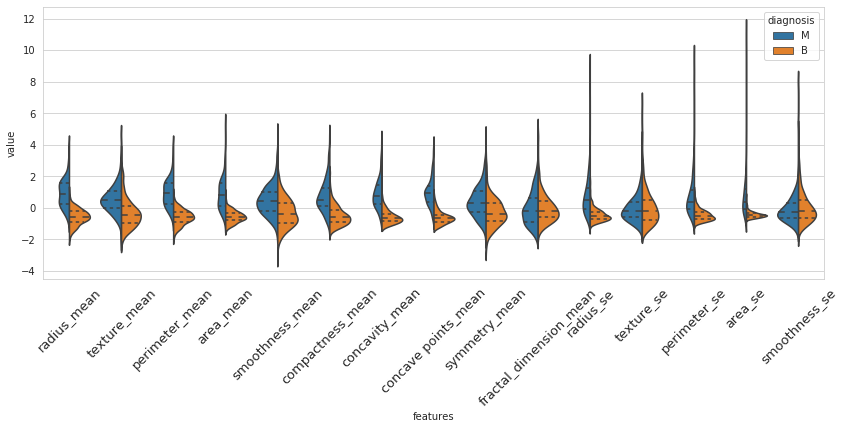

In [10]:
data_dia = df['diagnosis']
data = df.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([df['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13);

the interpretion of the plot :

 1.  in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. 
 2.  in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification

<a id='kde'></a>
> ### Kde Plot For Each Mean Feature 

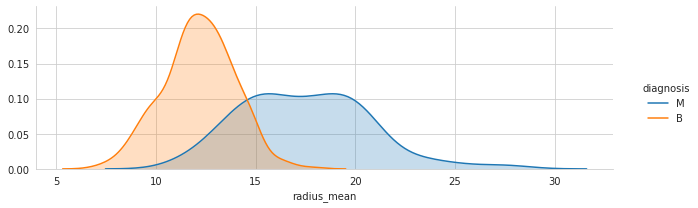

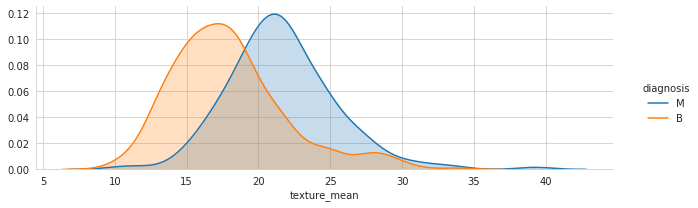

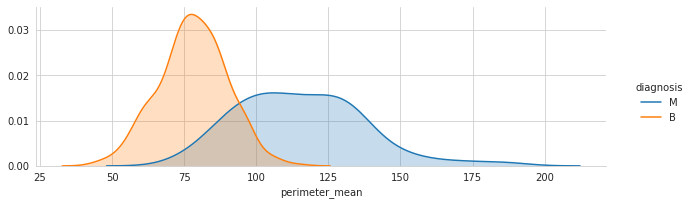

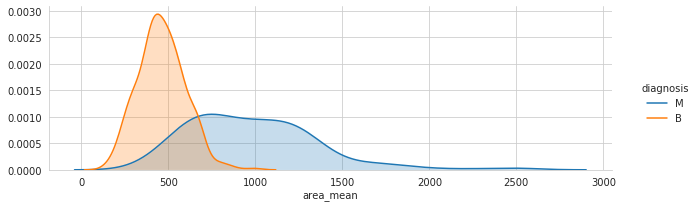

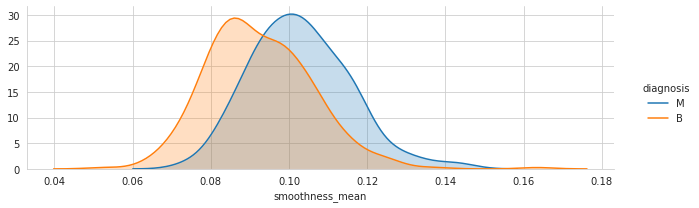

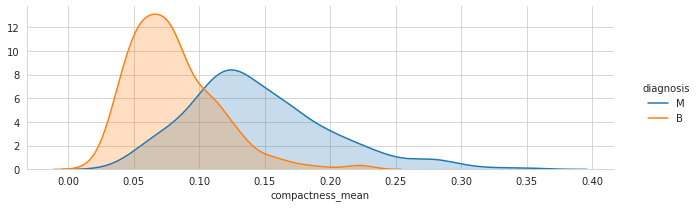

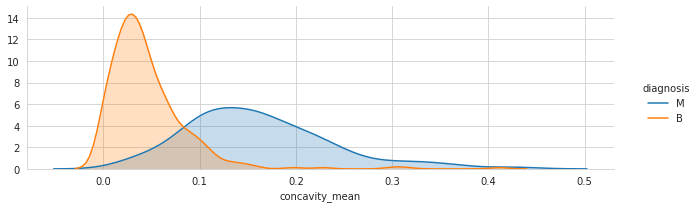

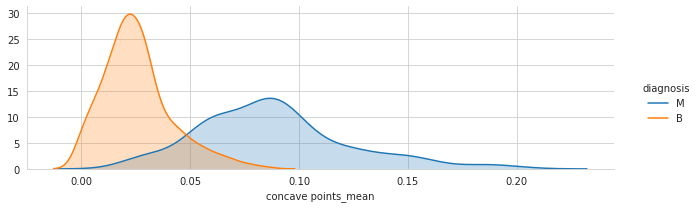

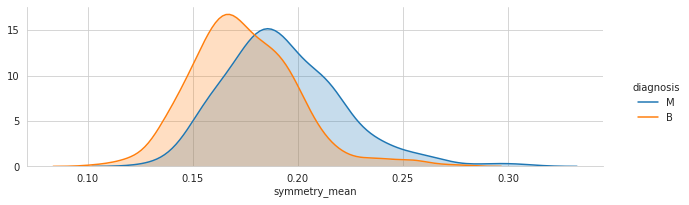

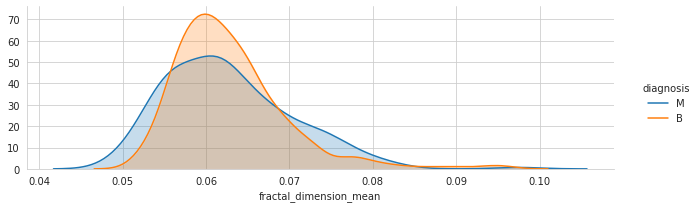

In [11]:
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()


<a id='rbf'></a>
## Relationship Between Features  <br>
> - We can say that two variables are related with each other, if one of them gives information about others
- For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
- Scatter Plot:  Simplest way to check relationship between two variables
- Lets look at relationship between radius mean and area mean. In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
- There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

<a id='chm'></a>
> ### Correlation Heatmap

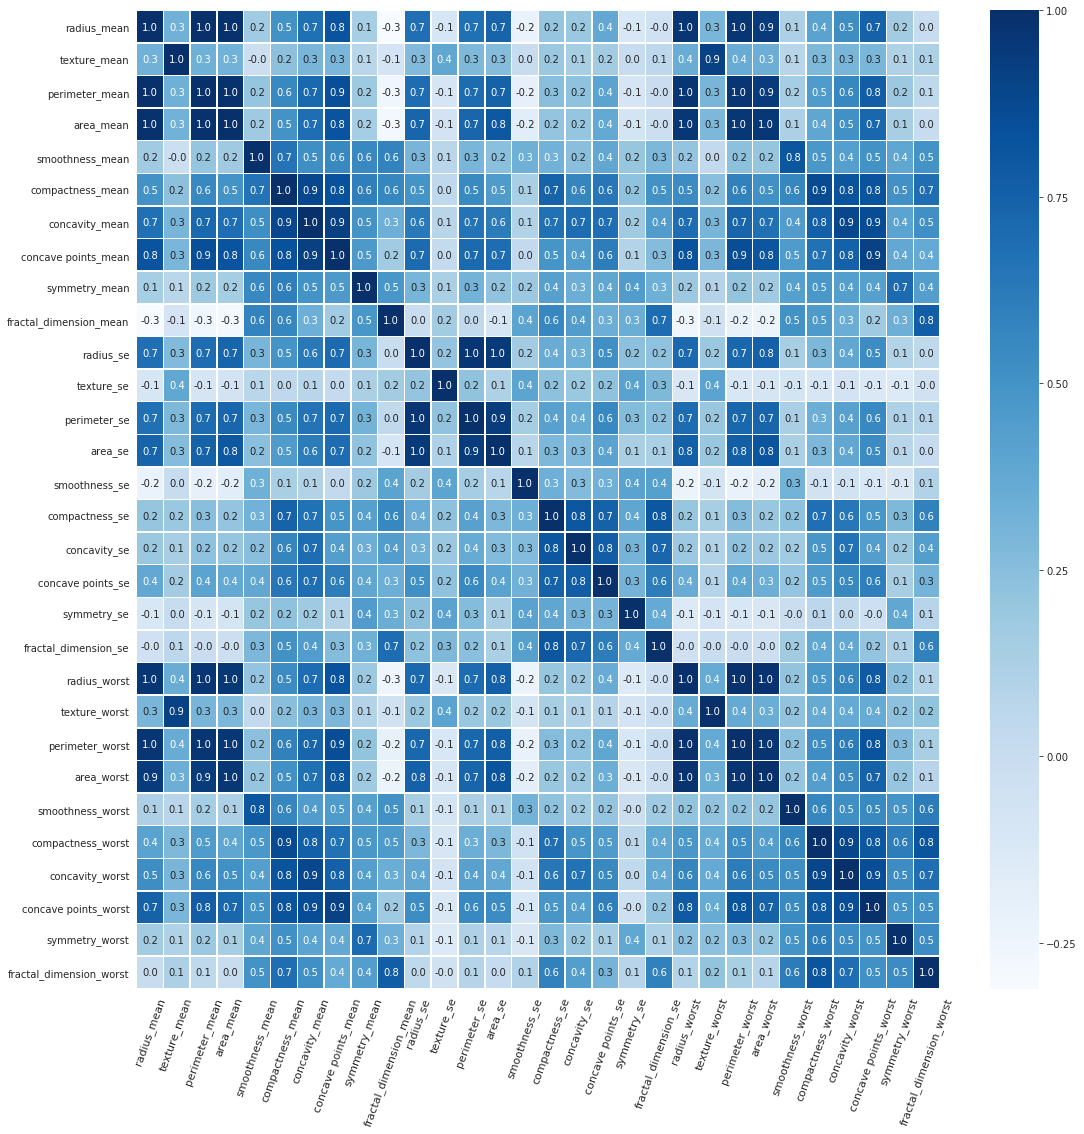

In [12]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

> **observation:**  <br> 
- the radius, perimeter and area are highly correlated as expected from their relation so from these we will use anyone of them
- compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
- so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

<a id='fp'></a>
> ### Feature Pair
Visualizing Data with Pairs Plots 

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis.

The default pairs plot in seaborn only plots numerical columns although later we will use the categorical variables for coloring.

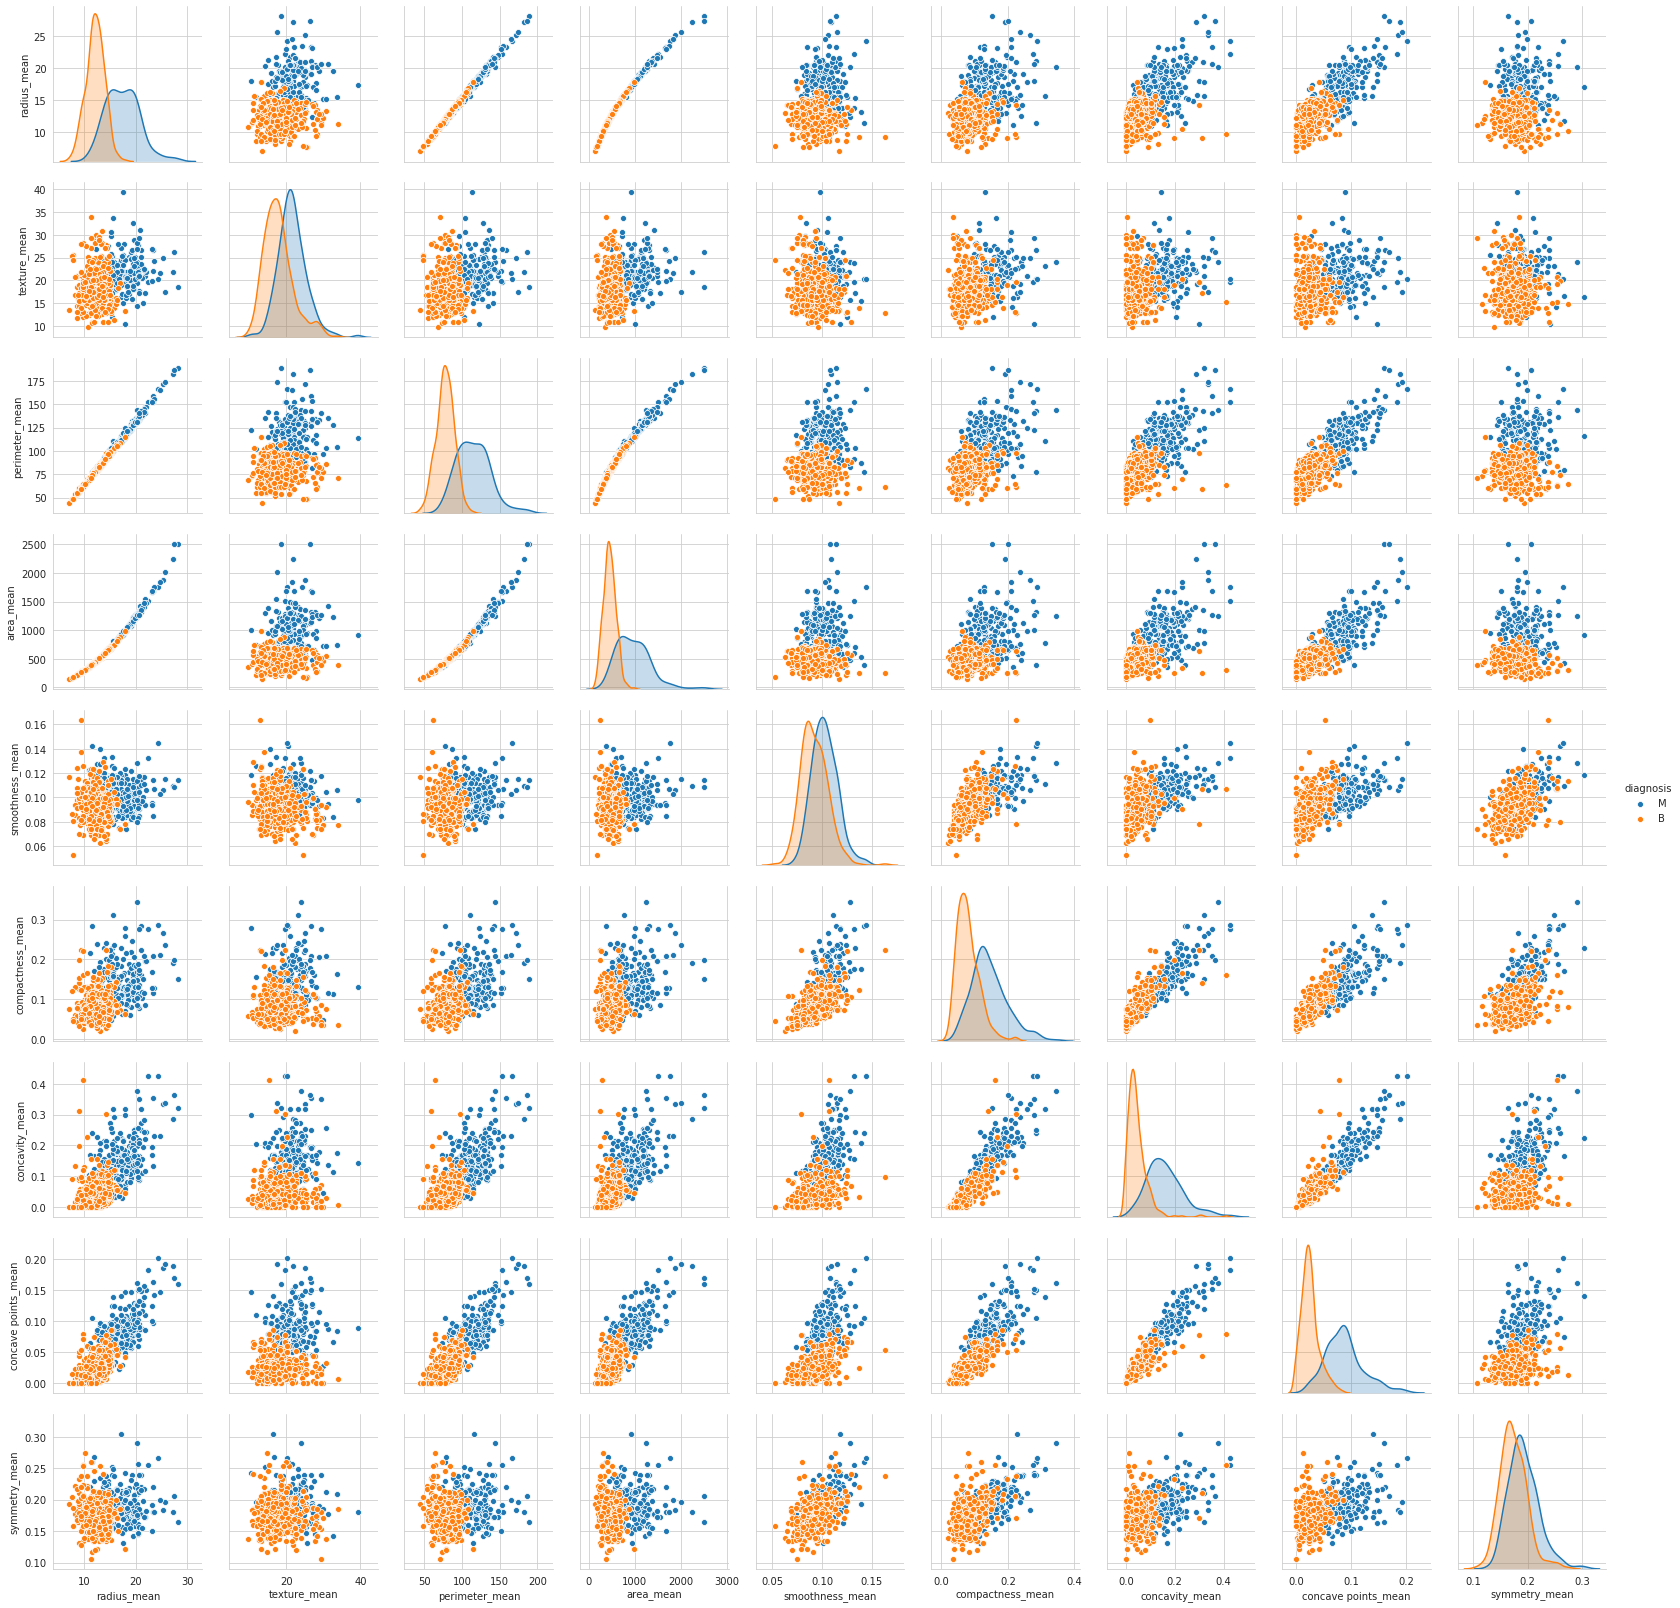

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')

<a id='pcf'></a>
> ### Positively Correlated Features

1. Positive Correlation: means that if feature A increases then feature B also increases or if feature A decreases then feature B also decreases. Both features move in tandem and they have a linear relationship.

2. Negative Correlation: means that if feature A increases then feature B decreases and vice versa.

3. No Correlation: No relationship between those two attributes.

4. If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model.

5. There are multiple ways to deal with this problem. The easiest way is to delete or eliminate one of the perfectly correlated features. Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).
6. Spearman VS Pearson Correlation Matrix:
   Spearman and Pearson are two statistical methods to calculate the strength of correlation between two variables or attributes. 
   
     b. Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship
     
     a. If the variables have a non-linear relationship, you can measure the correlation using Spearman Correlation Coefficient. It can also be used with ordinal categorical variables. You can get the Spearman Coefficient Score by running: scipy.stats.spearmanr(X,Y)
     
7. with high-dimensional datasets  it is better to visualize the correlation in a matrix

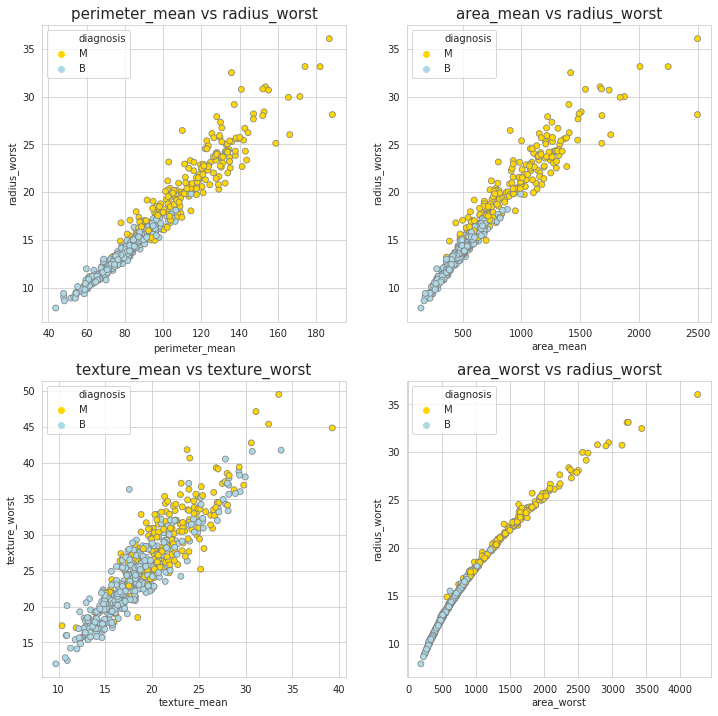

In [14]:
palette ={'B' : 'lightblue', 'M' : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.color_palette("bright")
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1

    
plot_scatter('perimeter_mean','radius_worst',221)   
plot_scatter('area_mean','radius_worst',222)   
plot_scatter('texture_mean','texture_worst',223)   
plot_scatter('area_worst','radius_worst',224)   

<a id = 'ucf'></a>
> ### Un-Correlated Features 

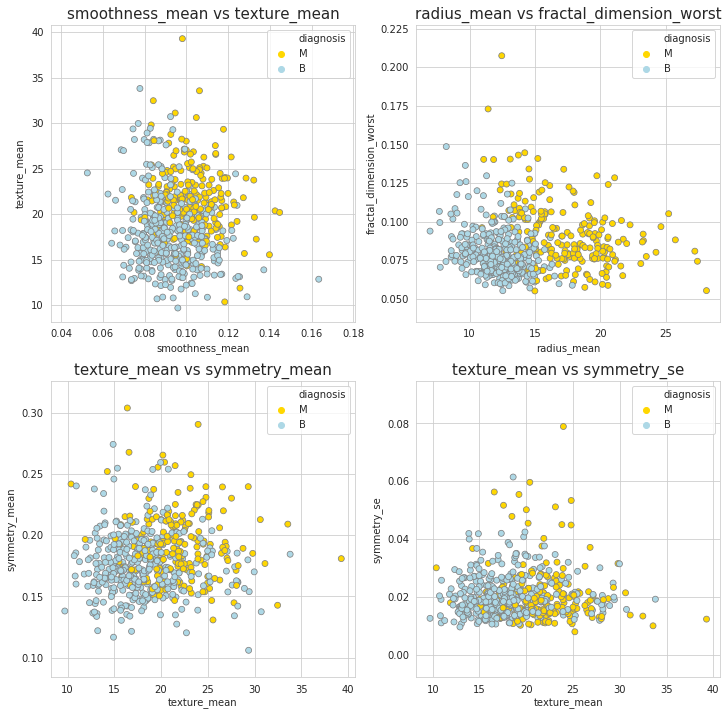

In [15]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_mean',223)
plot_scatter('texture_mean','symmetry_se',224)

<a id='ncf'></a>
> ### Negatively Correlated Features

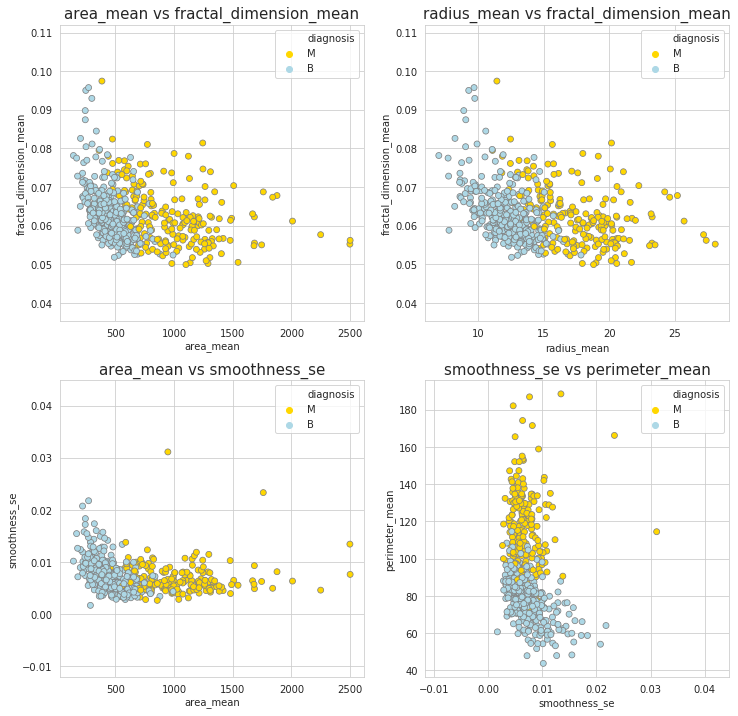

In [16]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

<a id='sa'></a>

## Statistical Analysis(Outliers Detection) <br>

> While looking histogram there are rare values in bening distribution (green in graph) <br>
There values can be errors or rare events.   <br>
These errors and rare events can be called outliers.  <br>
Calculating outliers:   
- first we need to calculate first quartile (Q1)(25%)  <br>
- then find IQR(inter quartile range) = Q3-Q1  <br>
- finally compute Q1 - 1.5IQR and Q3 + 1.5IQR   <br>
- Anything outside this range is an outlier   <br>

<a id='bp'></a>
> ### Box Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

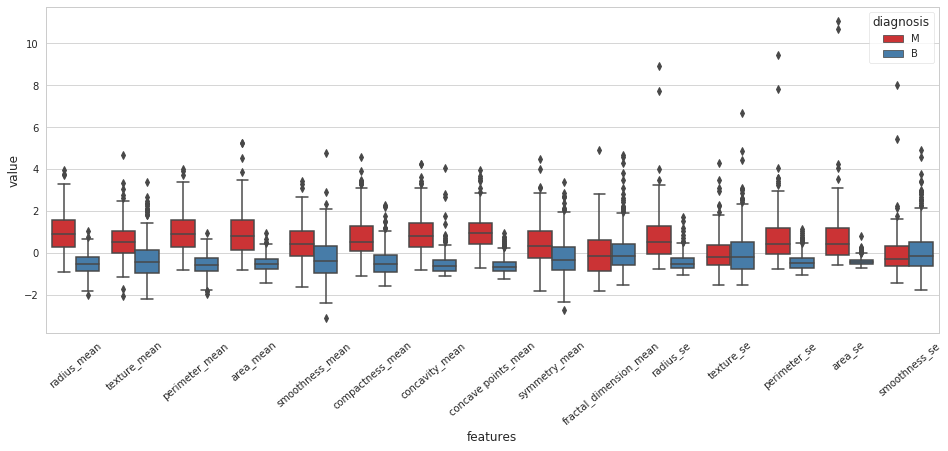

In [17]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette='Set1')
plt.xticks(rotation=40)

<a id='iqr'></a>
> ### Remove Outliers Using IQR

In [18]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [19]:
df.loc[Outliers_to_drop]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
108,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
164,M,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,...,28.010,28.22,184.20,2403.0,0.12280,0.35830,0.39480,0.23460,0.3589,0.09187
180,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,...,33.120,32.85,220.80,3216.0,0.14720,0.40340,0.53400,0.26880,0.2856,0.08082
202,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,...,25.120,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762
212,M,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,...,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525
236,M,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,...,31.010,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
339,M,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,...,30.670,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738
352,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,...,33.130,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815


In [20]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [21]:
df.shape

(486, 31)

<a id='pca'></a>
## Principal Component Analysis(PCA)
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

In [22]:
group_map = {"M": 1, "B": 0}

df['diagnosis'] = df['diagnosis'].map(group_map)

In [23]:
target_pca = pd.DataFrame(df['diagnosis'])
data_pca = df.drop('diagnosis', axis=1)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')

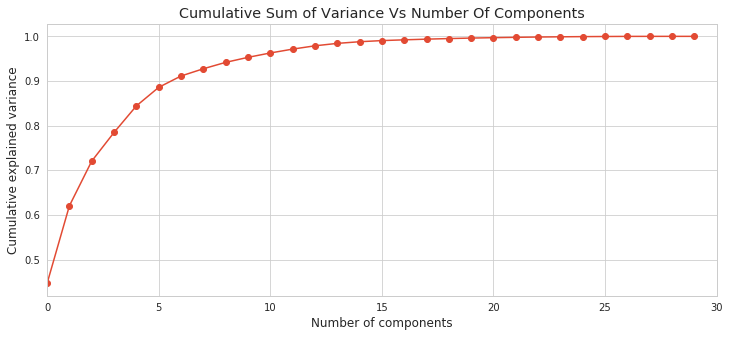

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [25]:
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
labels = []
for i in range(1,31):
    labels.append('Col_'+str(i))
trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15))
layout = dict(title =  'PCA : components and explained variance')
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [26]:
pca.explained_variance_ratio_

array([4.46380247e-01, 1.73921362e-01, 1.00118724e-01, 6.42590674e-02,
       5.94288560e-02, 4.15840738e-02, 2.54594333e-02, 1.62203187e-02,
       1.43275858e-02, 1.12520663e-02, 9.80155599e-03, 8.63553161e-03,
       7.40950929e-03, 5.45161332e-03, 3.70277887e-03, 2.54032992e-03,
       1.71613424e-03, 1.51916114e-03, 1.30269213e-03, 1.11344975e-03,
       9.03492816e-04, 7.68698470e-04, 6.88546885e-04, 4.77091393e-04,
       4.07666896e-04, 2.85008652e-04, 2.48131245e-04, 5.26691004e-05,
       2.05729397e-05, 3.63227443e-06])